<div id="home"></div> 

# Python Computer Vision Basics with OpenCV
---
By: Todd Farr <br> 
https://github.com/todddangerfarr

--- 

### Chapter 0.1 Inspecting and Slicing Images - Table of Contents 

* 0.1.1: [Image Information](#basic_information)
* 0.1.2: [Slicing Images](#slicing_images) 

--- 

In [1]:
# library imports 
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches 

# plot images inline in the Jupyter Notebook 
%matplotlib inline

<div id="basic_information"></div> 


## 0.1.1 Image Information

<div style="text-align: right"><a href="#home">Back to ToC</a></div> 

----

#### First we need an image to work with... 
Dolphins, everybody loves dophins! 

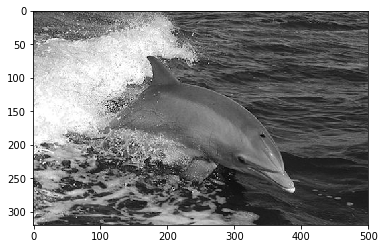

In [2]:
# Load an image and show it
# Remember that the 0 as a second argument means single channel grayscale
img = cv2.imread('images/dolphin.png', 0)
plt.imshow(img, cmap='gray')
plt.show()

A common operation is information about the images shape.  For the dolphin image since we read it as a single channel .shape will only unpack two values the height and the width of the image in pixels.

In [3]:
# basic information about the grayscale dolphin image 
height, width = img.shape
print("Image Width: {}, Image Height: {}".format(width, height))

Image Width: 500, Image Height: 320


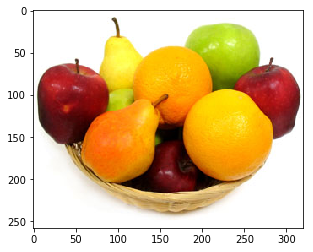

In [4]:
# reading in a color image 
img_color = cv2.imread('images/fruit.png')
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
plt.imshow(img_color)
plt.show()

Let's use the color above to now see what .shape unpacks.  If we only have height, width we will get an error because now *.shape* unpacks 3 values, but we only have 2 variable to store.  That's why we need to add a third variable, **depth**.

In [5]:
# basic information about the image 
height, width, depth = img_color.shape
print("Image Width: {}, Image Height: {}, Image Depth: {}".format(width, height, depth))

Image Width: 320, Image Height: 258, Image Depth: 3


<div id="slicing_images"></div> 


## 0.1.2 Slicing Images

<div style="text-align: right"><a href="#home">Back to ToC</a></div> 

----

### Single Pixels 

We saw this a little bit in Chapter 0.0, when we used a slicing operation to flip BGR images to RGB.  But now we are going to go a little deeper in terms of what sort of slicing is possible. Let's first start with the grayscale dolphin image. An important thing to remember here is that slicing is 0-indexed, meaning that if a image is 320 x 258 the indicies range 0-319 and 0-257. 

In [6]:
# find the intensity of a single pixel in the grayscale dolphin image 
pixel_of_interest = img[49, 99]
print('Pixel Intensity at row 50, column 100 = {}'.format(pixel_of_interest))

Pixel Intensity at row 50, column 100 = 208


Okay so 208...What does this mean exactly?  Well remember images are functions and in this case our grayscale image is just a matrix of instensity values between 0-255 where 0 represents black and 255 represents white and in between is the "gray" "scale."  It's literally just a linear scale of different shades of gray, but instead of only 50 like the E.L. James seductive novel we have 255... Let's take a closer look at the image to see if this makes sense. 

In [7]:
# First let's purposefully find a dark intensity pixel (close to 0)
# If we look at the dolphin picture above the water at the bottom is pretty dark 
dark_pixel_of_interest = img[309, 359]
print('Pixel Intensity at row 310, column 360 = {}'.format(dark_pixel_of_interest))

Pixel Intensity at row 310, column 360 = 30


Only 30!  That's pretty dark, but let's see if this makes sense via a quick visualization below.  From the looks of it both check out.  The light pixel we sliced out with an intesnity of 208 (indicated by the red dot) looks bright and the dark pixel we sliced out of the image with an intensity of 30 (indicated in blue) is in a dark region of the image. 

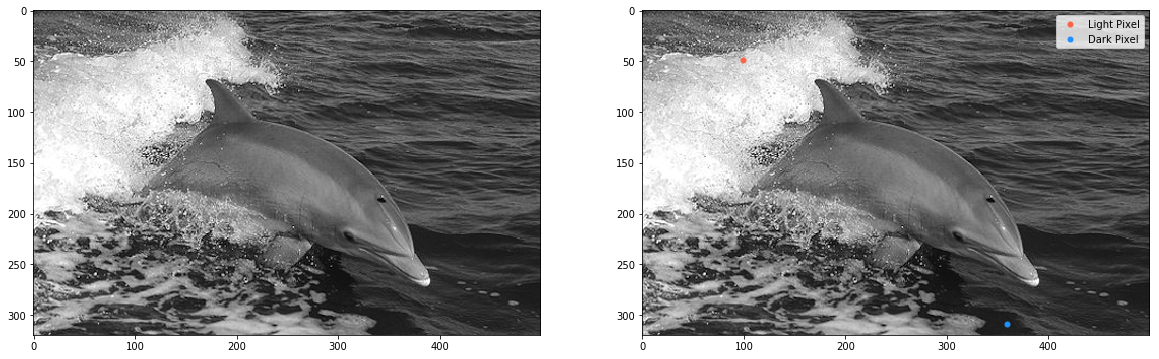

In [8]:
# Some Matplotlib figure and subplots stuff for visualization 
f, axes = plt.subplots(nrows=1, ncols=2)
f.set_size_inches(20, 7)

axes[0].imshow(img, cmap='gray')
axes[1].imshow(img, cmap='gray')
plt.plot([99], [49], color='tomato', markersize=5, marker='o', lw=0, label='Light Pixel')
plt.plot([359], [309], color='dodgerblue', markersize=5, marker='o', lw=0, label='Dark Pixel')

plt.legend(frameon=True)
plt.show()

### Row Slicing 

Okay we've sliced out single pixels. Now what about an entire row? 

First 10 Pixel Values of the Row: [231 242 228 215 235 249 247 247 246 244]


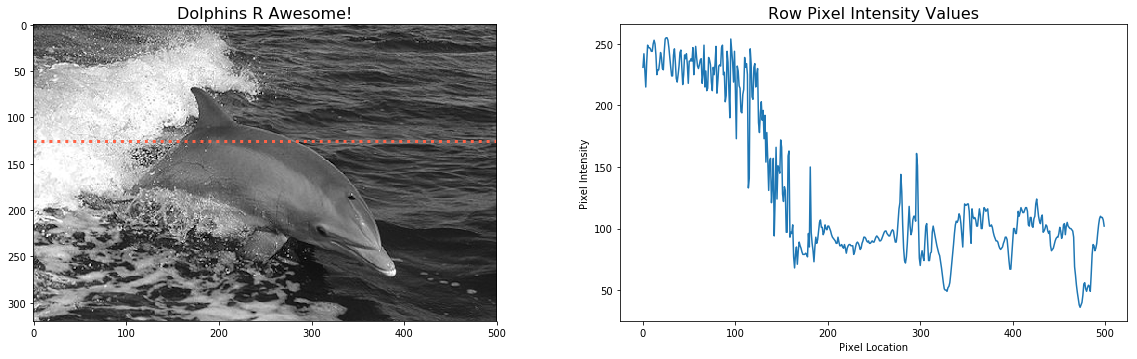

In [9]:
# slicing an entire row of an image 
row = img[125, :]
print('First 10 Pixel Values of the Row: {}'.format(row[:10]))

# some more matplotlib for visualizing what is happening
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])
f = plt.figure()
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
f.set_size_inches(20, 12)
ax1.set_title('Dolphins R Awesome!', fontsize=16)
ax1.imshow(img, cmap='gray')
ax1.axhline(125, ls='dotted', lw=3, color='tomato')
ax2.set_title('Row Pixel Intensity Values', fontsize=16)
ax2.set_xlabel('Pixel Location')
ax2.set_ylabel('Pixel Intensity')
ax2.plot(row)

plt.show()

Nice, we've successfully sliced a row of the image!  If we look at the plot on the right we can see how the pixel intensities change as we move accross this row.  It starts out high as we are in the wave break and as we hit the dolphin and the calmer water the pixel intensities drop as expected.  

### Chunk Slicing 

So we've sliced single pixels and entire rows.  What about slicing chunks of an image?  Let's see if we can make that happen! Let's say I just want to see the dolphins face... how am I going to figure out what pixels I need to grab?  Well here's a little pro tip for you.  

<IPython.core.display.Javascript object>


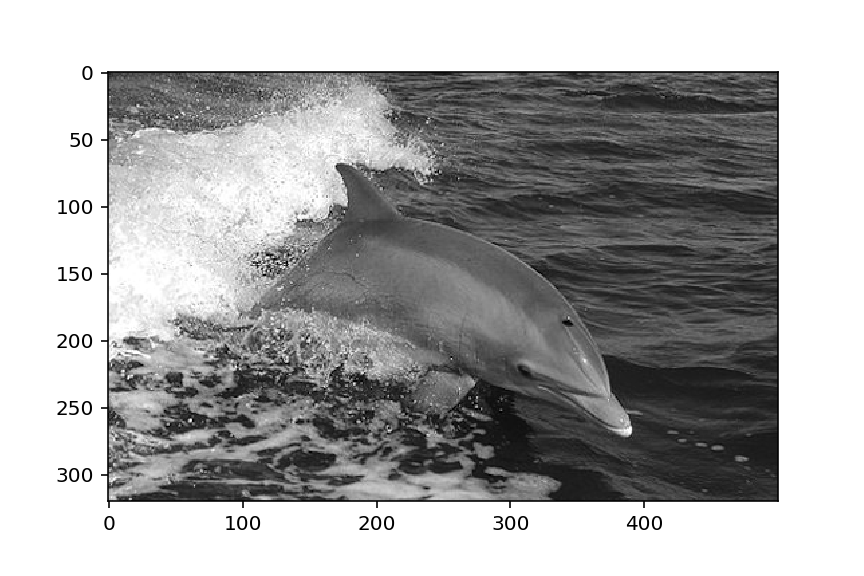

In [13]:
# move plotting to a notebook for an interactive display
# This is so we can select the appropriate pixesl for getting the dolphin face 
%matplotlib notebook

plt.imshow(img, cmap='gray')
plt.show()

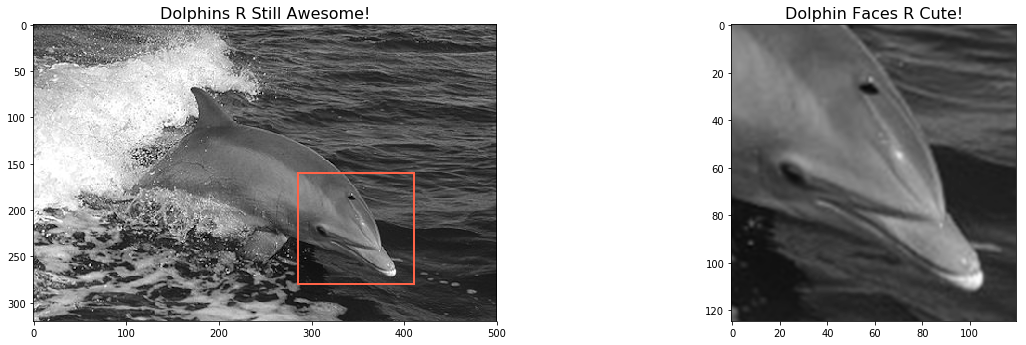

In [11]:
# from my interactions above I found that the dolphins face best fits within: 
dolphin_face = img[160:285, 285:405]

# switch back to static plots 
%matplotlib inline 

# Some matplotlib to visualize what's happening 
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])
f = plt.figure()
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
f.set_size_inches(20, 12)
ax1.set_title('Dolphins R Still Awesome!', fontsize=16)
ax1.imshow(img, cmap='gray')
face_outline = patches.Rectangle((285, 160), 125, 120, linewidth=2, edgecolor='tomato', facecolor='none')
ax1.add_patch(face_outline)

# Added bicubic here to make the face less pixelated.  We will cover this more later 
ax2.imshow(dolphin_face, cmap='gray', interpolation='bicubic')
ax2.set_title('Dolphin Faces R Cute!', fontsize=16)

plt.show()